In [96]:
import torch
device = torch.device("cuda")
torch.cuda.current_device()
torch.cuda.get_device_name(torch.cuda.current_device())
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split

In [27]:
data = pd.read_csv('.\\Ha_Tinh_My_Loc\\Meteo_Vrain_data.csv')

In [28]:
X = data[['Meteo']].values
y = data[['Vrain']].values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
class RainConversionModel(nn.Module):
    def __init__(self):
        super(RainConversionModel, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

In [113]:
def train_model(X_train, y_train, epochs=2000, learning_rate=0.001):
    # Init
    model = RainConversionModel()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Convert to tensor
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)

    # Train
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        
        if epoch % 200 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    return model

In [114]:
trained_model = train_model(X_train, y_train, epochs=2000, learning_rate=0.001)

Epoch 0, Loss: 1.5727674961090088
Epoch 200, Loss: 1.3162921667099
Epoch 400, Loss: 1.3158918619155884
Epoch 600, Loss: 1.3157110214233398
Epoch 800, Loss: 1.3155683279037476
Epoch 1000, Loss: 1.3154526948928833
Epoch 1200, Loss: 1.315369963645935
Epoch 1400, Loss: 1.315270185470581
Epoch 1600, Loss: 1.315134882926941
Epoch 1800, Loss: 1.3149949312210083


In [115]:
trained_model.eval()
with torch.no_grad():
    X_test_tensor = torch.FloatTensor(X_test)
    predictions = trained_model(X_test_tensor)

In [116]:
y_test_flat = y_test.flatten()
predictions_flat = predictions.flatten()

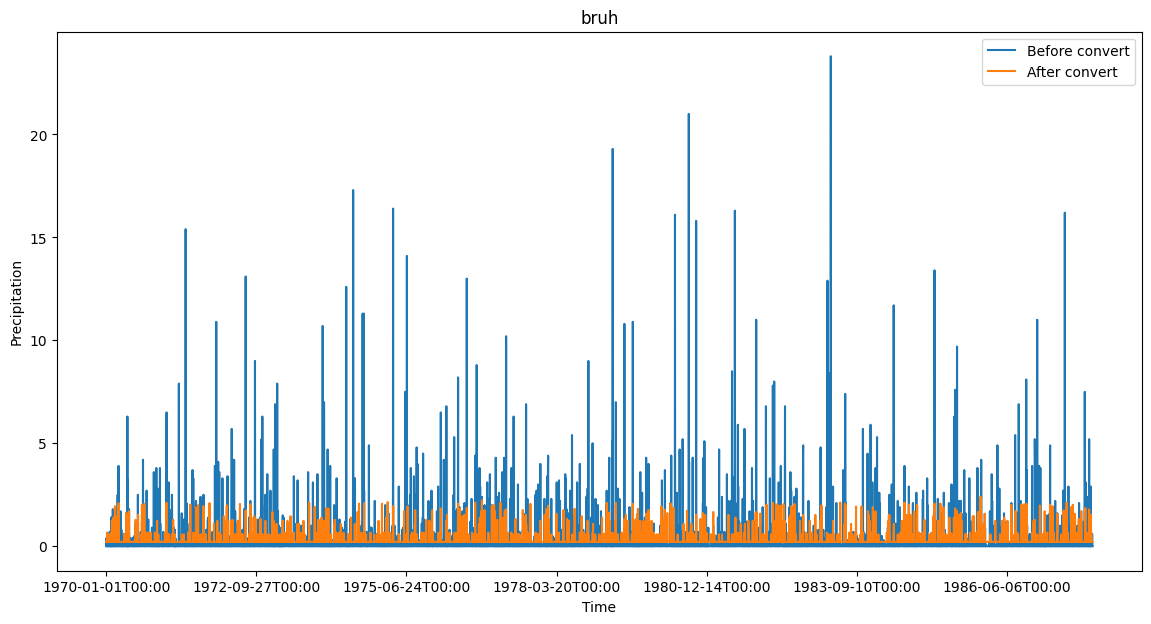

In [117]:
import matplotlib.pyplot as plt
import numpy as np
# Plot predictions vs actual values
time = data[['time']].values.flatten()
plt.figure(figsize=(14, 7))
plt.plot(y_test_flat, label='Before convert')
plt.plot(predictions_flat, label='After convert')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%dT%H:%M'))
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('bruh')
plt.legend()
plt.show()